In [27]:
#import required classes and packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import smtplib
import warnings
warnings.filterwarnings('ignore')

In [10]:
#loading and displaying chicago crime dataset
dataset = pd.read_csv("Dataset/BP.csv")
dataset

,Timestamp,Systolic_BP,Diastolic_BP,label
0,2024-05-17 12:45:45.968890,134,83,High_BP_Stage1_Hypertension
1,2024-05-17 12:15:45.968890,131,85,High_BP_Stage1_Hypertension
2,2024-05-17 12:11:45.968890,131,83,High_BP_Stage1_Hypertension
3,2024-05-17 11:19:45.968890,135,83,High_BP_Stage1_Hypertension
4,2024-07-19 21:24:45.729841,123,64,Elevated
...,...,...,...,...
29698,2024-06-07 14:47:45.884888,94,72,Normal
29699,2024-06-07 14:43:45.884888,95,74,Normal
29700,2024-06-07 14:37:45.884888,107,66,Normal
29701,2024-06-07 14:31:45.884888,119,70,Normal


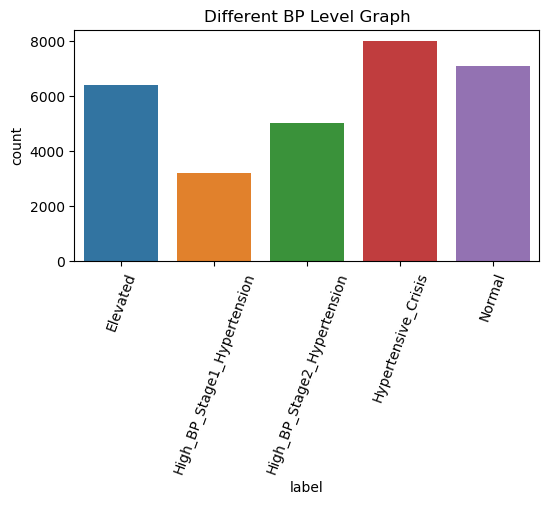

In [11]:
data = dataset.groupby("label").size().reset_index(name="count")
plt.figure(figsize=(6,3))
sns.barplot(data=data,x="label", y="count")
plt.title("Different BP Level Graph")
plt.xticks(rotation=70)
plt.show()

In [12]:
#dataset pre-processing such as label encoding to integer values
labels = np.unique(dataset['label'])
le = LabelEncoder()
dataset['label'] = pd.Series(le.fit_transform(dataset['label'].astype(str)))#encode all str columns to numeric
dataset.fillna(dataset.mean(), inplace = True)#handling missing value
dataset

,Timestamp,Systolic_BP,Diastolic_BP,label
0,2024-05-17 12:45:45.968890,134,83,1
1,2024-05-17 12:15:45.968890,131,85,1
2,2024-05-17 12:11:45.968890,131,83,1
3,2024-05-17 11:19:45.968890,135,83,1
4,2024-07-19 21:24:45.729841,123,64,0
...,...,...,...,...
29698,2024-06-07 14:47:45.884888,94,72,4
29699,2024-06-07 14:43:45.884888,95,74,4
29700,2024-06-07 14:37:45.884888,107,66,4
29701,2024-06-07 14:31:45.884888,119,70,4


In [13]:
#dataset shuffling and normalization
dataset.drop(['Timestamp'], axis = 1,inplace=True)
Y = dataset['label'].ravel()
dataset.drop(['label'], axis = 1,inplace=True)
X = dataset.values
scaler = StandardScaler()
X = scaler.fit_transform(X) #normalizing dataset values
indices = np.arange(X.shape[0])
np.random.shuffle(indices)#shuffling dataset to arrange all classes properly in train and test data
X = X[indices]
Y = Y[indices]
print("Normalzied Values = "+str(X))

Normalzied Values = [[-1.46919663 -0.15310206]
 [-0.03119679 -0.27433719]
 [ 0.40456073  0.21060334]
 ...
 [-0.29265131 -0.69866016]
 [-0.90271185 -0.75927773]
 [-0.33622706 -0.88051286]]


In [14]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3)
print("Train & Test Dataset Split")
print("70% records used to train algorithms : "+str(X_train.shape[0]))
print("30% records features used to test algorithms : "+str(X_test.shape[0]))
data = np.load("model/data.npy", allow_pickle=True)
X_train, X_test, y_train, y_test = data

Train & Test Dataset Split
70% records used to train algorithms : 20792
30% records features used to test algorithms : 8911


In [18]:
#define global variables to save accuracy and other metrics
accuracy = []
precision = []
recall = []
fscore = []

In [19]:
#function to calculate all metrics
def calculateMetrics(algorithm, testY, predict):
    p = precision_score(testY, predict,average='macro')
    r = recall_score(testY, predict,average='macro')
    f = f1_score(testY, predict,average='macro')
    a = accuracy_score(testY,predict)
    mse = mean_squared_error(testY, predict)
    accuracy.append(a)
    precision.append(p)
    recall.append(r)
    fscore.append(f)
    print(algorithm+" Accuracy  : "+str(a))
    print(algorithm+" Precision : "+str(p))
    print(algorithm+" Recall    : "+str(r))
    print(algorithm+" FSCORE    : "+str(f))
    print(algorithm+" MSE       : "+str(mse))
    conf_matrix = confusion_matrix(testY, predict)
    plt.figure(figsize=(6, 4))
    ax = sns.heatmap(conf_matrix, xticklabels = labels, yticklabels = labels, annot = True, cmap="viridis" ,fmt ="g");
    ax.set_ylim([0,len(labels)])
    plt.title(algorithm+" Confusion matrix") 
    plt.show()

Decision Tree Accuracy  : 0.9988777914936595
Decision Tree Precision : 0.9978540772532188
Decision Tree Recall    : 0.9991840065279478
Decision Tree FSCORE    : 0.998512420604364
Decision Tree MSE       : 0.004488834025361912


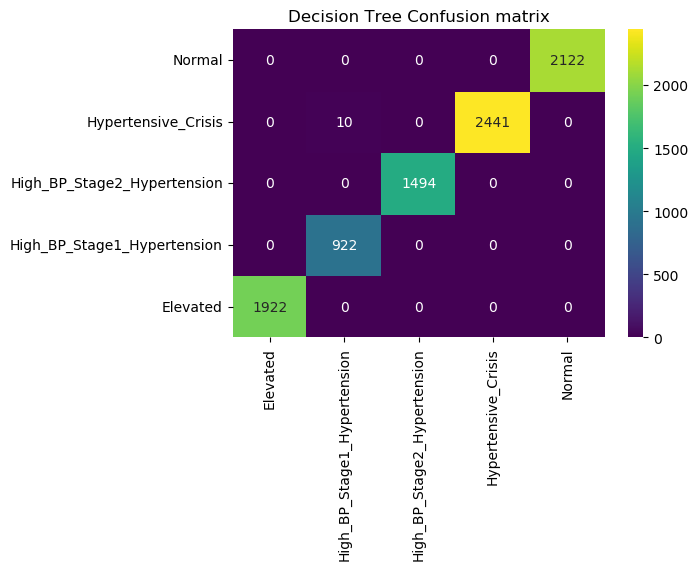

In [20]:
#training decision tree algorithm on 70% training features
dt = DecisionTreeClassifier(max_depth=5)
dt.fit(X_train, y_train)
#performing prediction on test data
predict = dt.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("Decision Tree", y_test, predict)

Logistic Regression Accuracy  : 0.6909437773538324
Logistic Regression Precision : 0.5727473967247843
Logistic Regression Recall    : 0.632533015650352
Logistic Regression FSCORE    : 0.6005976404900836
Logistic Regression MSE       : 1.720570081921221


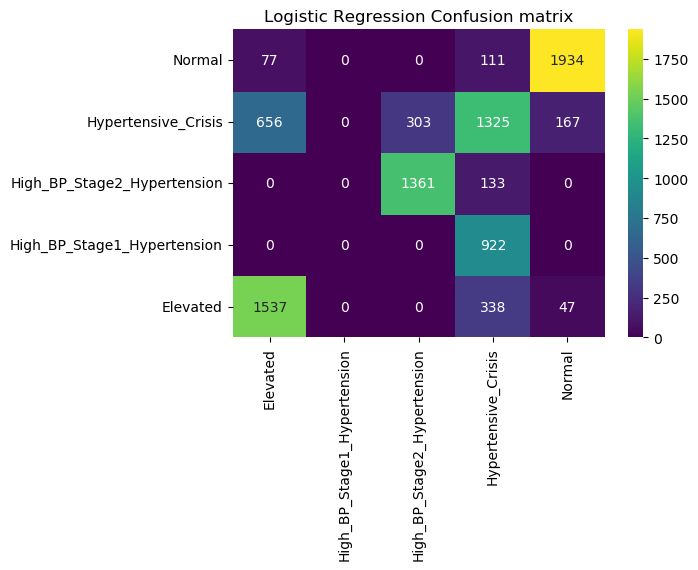

In [21]:
#training Logistic Regression algorithm on 70% training features
lr = LogisticRegression(solver="liblinear")
lr.fit(X_train, y_train)
#performing prediction on test data
predict = lr.predict(X_test)
#call this function to calculate accuracy and other metrics
calculateMetrics("Logistic Regression", y_test, predict)

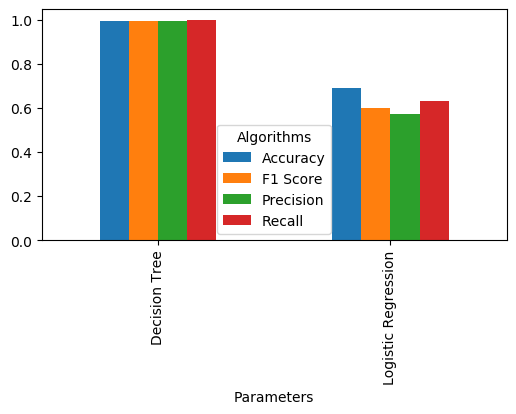

In [22]:
#visualizing all algorithms performance graph
df = pd.DataFrame([['Decision Tree','Precision',precision[0]],['Decision Tree','Recall',recall[0]],['Decision Tree','F1 Score',fscore[0]],['Decision Tree','Accuracy',accuracy[0]],
                   ['Logistic Regression','Precision',precision[1]],['Logistic Regression','Recall',recall[1]],['Logistic Regression','F1 Score',fscore[1]],['Logistic Regression','Accuracy',accuracy[1]],
                  ],columns=['Parameters','Algorithms','Value'])                
df.pivot("Parameters", "Algorithms", "Value").plot(kind='bar', figsize=(6,3))                
plt.show()

In [23]:
#display all algorithm performnace
algorithms = ['Decision Tree', 'Logistic Regression']
data = []
for i in range(len(accuracy)):
    data.append([algorithms[i], accuracy[i], precision[i], recall[i], fscore[i]])
data = pd.DataFrame(data, columns=['Algorithm Name', 'Accuracy', 'Precision', 'Recall', 'FSCORE'])
data  

,Algorithm Name,Accuracy,Precision,Recall,FSCORE
0,Decision Tree,0.998878,0.997854,0.999184,0.998512
1,Logistic Regression,0.690944,0.572747,0.632533,0.600598


In [28]:
#function to send mail
def sendMail(message):
    em = []
    em.append("kaleem.mmd@gmail.com") #change here desired email id to receive mails==================
    with smtplib.SMTP_SSL('smtp.gmail.com', 465) as connection:
        email_address = 'kaleem202120@gmail.com'
        email_password = 'xyljzncebdxcubjq'
        connection.login(email_address, email_password)
        connection.sendmail(from_addr="kaleem202120@gmail.com", to_addrs=em, msg="Subject : BP Monitoring\n"+message)

In [29]:
#load test data and then predict attacks
testdata = pd.read_csv("Dataset/testData.csv")
temp = testdata.values
testdata = scaler.transform(testdata)#normalize test data
predict = dt.predict(testdata)#apply decision tree object to predict test data
output = ""
for i in range(len(predict)):#loop and print predicted values
    output += str(temp[i])+" Prediction = "+labels[predict[i]]+"\n"
    print("Test Data = "+str(temp[i])+" =====> "+labels[predict[i]]+"\n") 
sendMail(output)    

Test Data = [118  78] =====> Normal

Test Data = [140 119] =====> High_BP_Stage2_Hypertension

Test Data = [125  74] =====> Elevated

Test Data = [129  72] =====> Elevated

Test Data = [133  87] =====> High_BP_Stage1_Hypertension

Test Data = [177  65] =====> Hypertensive_Crisis

Test Data = [131  85] =====> High_BP_Stage1_Hypertension

Test Data = [158  98] =====> High_BP_Stage2_Hypertension

Test Data = [146  90] =====> Hypertensive_Crisis

Test Data = [116  72] =====> Normal

